In [1]:
# If additional packages need to be used, uncomment the last two lines of this cell and replace <package list> with 
# a list of additional packages.
# This will ensure the notebook has all the dependencies satisfied and works everywhere.

#import sys
#!{sys.executable} -m pip install <package list>

#!py -m pip install tensorflow
# !pip install pandas  # install pandas if you have not done so
# !pip install matplotlib same for matplotlib to visualize the result 
#!pip install scikit-plot

### Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from warnings import filterwarnings



In [2]:
import tensorflow as tf
from tensorflow import keras
tf.__version__
keras.__version__

'2.10.0'

In [3]:
fashion_mnist = keras.datasets.fashion_mnist
(X_Train_full, Y_Train_full), (X_Test, Y_Test) = fashion_mnist.load_data()

In [7]:
#pixel intensities down to the 0-1 range by dividing them by 255.0 and generate validation set
X_Valid,X_Train=X_Train_full[:5000]/255.0,X_Train_full[5000:]/255.0
Y_Valid,Y_Train=Y_Train_full[:5000],Y_Train_full[5000:]

In [8]:
# print the information about the train and test set
print('Information about the Fashion MNIST Dataset Shape:')
print('X_train: ' + str(X_Train.shape))
print('Y_train: ' + str(Y_Train.shape))
print('X_test:  '  + str(X_Test.shape))
print('Y_test:  '  + str(Y_Test.shape))

Information about the Fashion MNIST Dataset Shape:
X_train: (55000, 28, 28)
Y_train: (55000,)
X_test:  (10000, 28, 28)
Y_test:  (10000,)


**Y variables contain the labels and the description is in the following table**

|Label  | Description|
|-----  |------------|
|  0    | T-shirt/top|
|  1    | Trowser    |
|  2    | Pullover   |
|  3    |  Dress     |
|  4    |  Coat      |
|  5    |  Sandal    |
|  6    |  Shirt     |
|  7    |  Sneaker   |
|  8    |  Bag       |
|  9    | Ankle Boot |

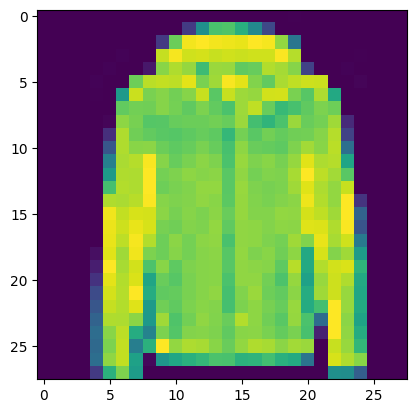

In [9]:
# To show the image
imgplot=plt.imshow(X_Train[0])

In [10]:
# generate MLP with two hidden layers
model=keras.models.Sequential()   # creates a Sequential API model
model.add(keras.layers.Flatten(input_shape=[28,28]))    # Flattening the layer to convert each input image into a 1D array means with the input data of X, it computes X.reshape(-1,1)  
model.add(keras.layers.Dense(300,activation="relu"))  # A dense hidden layer with 300 neurons with ReLU activation function (it is managing its own weight matrix consists of all the connection weights between the neurons and thier inputs plus one per neuron as the bias term)
model.add(keras.layers.Dense(100,activation="relu"))  # add the second layer with 100 neurons
model.add(keras.layers.Dense(10,activation="softmax"))  # add a dense output layer with 10 neurons (oe per class) containing softmax activation function

# or use the following strategy to create same model but building the layers at the same time. These codes have been commented
# model = keras.models.Sequential([
# keras.layers.Flatten(input_shape=[28, 28]),
# keras.layers.Dense(300, activation="relu"),
# keras.layers.Dense(100, activation="relu"),
# keras.layers.Dense(10, activation="softmax")
# ])

In [11]:
model.summary()   # the first hidden layer has 784 x 300 connection wights with 300 bias terms, in total generates 235500 parameters

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [13]:
model.compile(loss="sparse_categorical_crossentropy",optimizer="sgd",metrics=["accuracy"])

In [65]:
# we can use two Callbacks approches one, EarlyStopping callback which interrupt training when it measures no progress on the validation set for a number of epochs. This approach interrupt training once it will not find any improvment  
checkpoint_c=keras.callbacks.ModelCheckpoint("my_keras_modell.h5",save_best_only=True)
early_Stopping_c=keras.callbacks.EarlyStopping(patience=20,restore_best_weights=True)
history1=model.fit(X_Train,Y_Train,epochs=70,validation_data=(X_Valid,Y_Valid),callbacks=[checkpoint_c,early_Stopping_c])

Epoch 1/70
1719/1719 [==============================] - 7s 4ms/step - loss: 0.0085 - accuracy: 0.9987 - val_loss: 0.5388 - val_accuracy: 0.8942
Epoch 2/70
1719/1719 [==============================] - 6s 3ms/step - loss: 0.0075 - accuracy: 0.9989 - val_loss: 0.5551 - val_accuracy: 0.8962
Epoch 3/70
1719/1719 [==============================] - 6s 3ms/step - loss: 0.0144 - accuracy: 0.9961 - val_loss: 0.5392 - val_accuracy: 0.8934
Epoch 4/70
1719/1719 [==============================] - 6s 3ms/step - loss: 0.0158 - accuracy: 0.9955 - val_loss: 0.5424 - val_accuracy: 0.8950
Epoch 5/70
1719/1719 [==============================] - 7s 4ms/step - loss: 0.0069 - accuracy: 0.9993 - val_loss: 0.5618 - val_accuracy: 0.8958
Epoch 6/70
1719/1719 [==============================] - 7s 4ms/step - loss: 0.0073 - accuracy: 0.9989 - val_loss: 0.5459 - val_accuracy: 0.8958
Epoch 7/70
1719/1719 [==============================] - 5s 3ms/step - loss: 0.0088 - accuracy: 0.9983 - val_loss: 0.5939 - val_accuracy:

In [14]:
# Another approach will stop the training when its performance on the validation set is the best so far. This will guarantee an early stopping approach. It will restore the last model saved after training.
checkpoint_cb=keras.callbacks.ModelCheckpoint("my_keras_model.h5",save_best_only=True)
history=model.fit(X_Train,Y_Train, epochs=70,validation_data=(X_Valid,Y_Valid),callbacks=[checkpoint_cb])
model=keras.models.load_model("my_keras_model.h5")  # save the model for the future

Epoch 1/70
1719/1719 [==============================] - 8s 4ms/step - loss: 0.7035 - accuracy: 0.7687 - val_loss: 0.5401 - val_accuracy: 0.8076
Epoch 2/70
1719/1719 [==============================] - 10s 6ms/step - loss: 0.4858 - accuracy: 0.8315 - val_loss: 0.4577 - val_accuracy: 0.8468
Epoch 3/70
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4396 - accuracy: 0.8464 - val_loss: 0.4287 - val_accuracy: 0.8544
Epoch 4/70
1719/1719 [==============================] - 8s 5ms/step - loss: 0.4124 - accuracy: 0.8548 - val_loss: 0.4051 - val_accuracy: 0.8634
Epoch 5/70
1719/1719 [==============================] - 9s 5ms/step - loss: 0.3924 - accuracy: 0.8619 - val_loss: 0.3858 - val_accuracy: 0.8662
Epoch 6/70
1719/1719 [==============================] - 9s 5ms/step - loss: 0.3762 - accuracy: 0.8667 - val_loss: 0.3933 - val_accuracy: 0.8590
Epoch 7/70
1719/1719 [==============================] - 6s 4ms/step - loss: 0.3628 - accuracy: 0.8712 - val_loss: 0.3609 - val_accuracy

In [32]:
# To find at which epoch the best model has been found  
best_score = max(history.history['val_accuracy'])
for i in range (len(history.history['val_accuracy'])):    
    if history.history['val_accuracy'][i]==0.902999997138977:
       print(i)

46


**I considered the second approach because in this way the training will not be stopped and after training, the best model will be restored. Here the best model is considered at epoch 46**

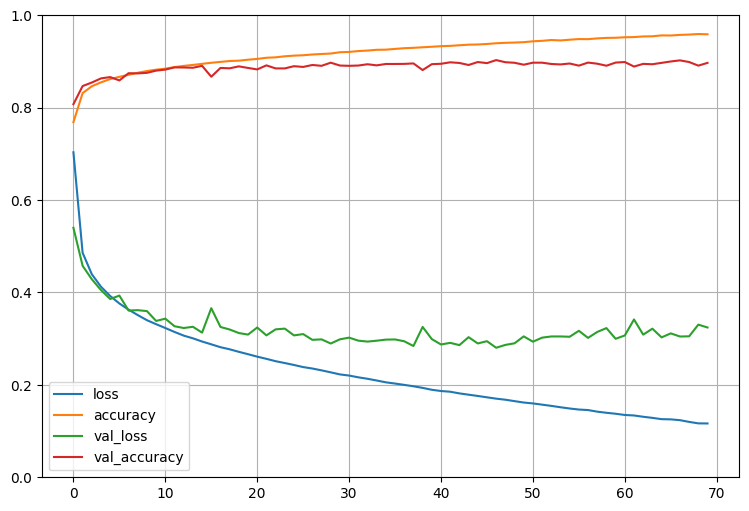

In [15]:
# show the learning curve

import pandas as pd
from matplotlib import pyplot as plt

pd.DataFrame(history.history).plot(figsize=(9,6))
plt.grid(True)
plt.gca().set_ylim(0,1)  # limit the y axes from 0 to 1

plt.show()

In [16]:
# After tuning the model's hyperparameters and satisfying with the model's validation accuracy, we can assess the model with test set before deploying it for production
model.evaluate(X_Test,Y_Test)

313/313 [==============================] - 1s 3ms/step - loss: 66.5188 - accuracy: 0.8554


[66.51880645751953, 0.855400025844574]

In [33]:
# To use the model for forcasting, we employ predict command
Y_probability=model.predict(X_Test) 
  
# the model estimates one probability for each class (0-9), but if we are looking for a class with the highest estimated probabilty then follow the next line of code 
Y_pred=np.argmax(Y_probability,axis=1)


313/313 [==============================] - 1s 3ms/step


In [34]:
# Now we can evaluate the result if works well on test set
print(Y_Test[4]) # the predcited class for the first element
#Y_probability=model.predict(X_Test[4]) 
print(Y_probability[4])


6
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


**As an example, We can see that we fetched an input with class #6 and to the model could predict with the probability information. If we try print(Y_pred[4]) then we will find the right class predcited from the probability information**

<AxesSubplot: title={'center': 'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

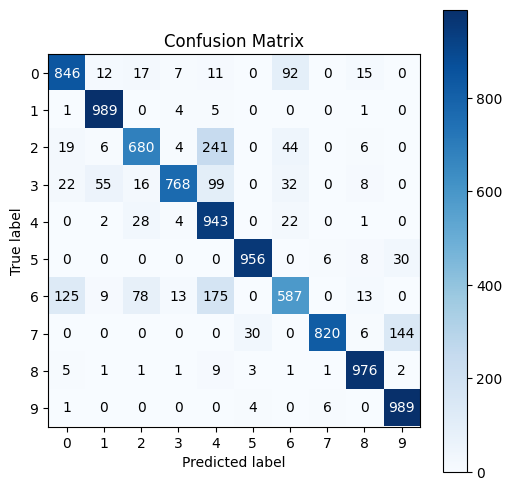

In [35]:
# By drawing a confusion matrix we find out how a classifier performed well on the classification problem
y_pred=Y_pred
y_true=Y_Test

from scikitplot.metrics import plot_confusion_matrix
fig, ax = plt.subplots(figsize=(6, 6))
plot_confusion_matrix(y_true, y_pred, ax=ax)

**The diagonal elements are the correctly predicted samples and it shows that classes #9 and #1 are the best classes and #6 was the worst ones 
class 1 is the best one the worst senario is #6. As an exmpale the column related to class #9, it shows that the samples originally belongs to this class has been confused a lot with class #7, but this class has a very good classification bundary with class #0,1,2,3,4,and 6. Also, to improve the model one needs to work on the result in class #6 with a lot of misclassified classes samples**